### Construcción de Cantidad de Pasajeros que llegaron a bogota en cada mes del año

Construye el DataSet de Pasajeros que llegaron a bogota en cada mes del año, sumando los pasajeros con destino final bogota de las bases de datos de aereocivil Origen Destino disponibles en 
https://www.aerocivil.gov.co/atencion/estadisticas-de-las-actividades-aeronauticas/bases-de-datos.

Importante las bases descargadas no tienen concistencia en el nombre de las columnas, se ajustaron manualmente las discrepancias, se elimino de manera manual la primera fila de cada archivo, se identificaron bases que no contienen algunas columnas importantes como el tipo de vuelo... perdiendo capacidad de construir mas variables 

En particular la base Descargada de Febrero 2021 contenia información de muchos años se llevo a la forma de las otras bases de manera manual

En particular la base Descargada de Julio 2021 contenia información de muchos años se llevo a la forma de las otras bases de manera manual

In [1]:
import os
import sys
## Esta Parte se debe ajustar en cada entorno usando el path local de cada desarrollador. 
path_local_dir='C:/Users/L58809/OneDrive - Kimberly-Clark/Desktop/pocc-03-sde-turismo' 
print(path_local_dir)
sys.path.append(path_local_dir)
import pandas as pd
import root
from itertools import product

dfs = []


C:/Users/L58809/OneDrive - Kimberly-Clark/Desktop/pocc-03-sde-turismo


In [2]:
years=['2019','2020','2021','2022']
months=['Enero','Febrero','Marzo','Abril','Mayo','Junio','Julio','Agosto','Septiembre','Octubre','Noviembre','Diciembre']
gridym=product(years,months)
dfPasajeros=pd.DataFrame(columns=['Año','Mes','Pasajeros'])
for [year,month] in gridym:
    filename=f'Base de Datos Origen - Destino {month} {year}.xlsx'
    pathfile=root.DIR_DATA_RAW+filename
    aeromes=pd.read_excel(pathfile) #Carga cada uno de las bases de Datos Origen Destino, para cada Mes y Año. 
    aerobog=aeromes[aeromes['Ciudad Destino']=='BOGOTA'] ## Filtra la Base por Ciudad Destino Bogota
    dfs.append(aerobog)
    pasajeros=aerobog.Pasajeros.sum() ## Suma el Total de Pasajeros 
    pasajeros=pasajeros.astype(int) ## Convierte a Enteros. 
    print(f'Los pasajeros con Destino Bogota en {month} del {year} fueron {pasajeros}')
    dfaux=pd.DataFrame({'Año':[year],'Mes':[month],'Pasajeros':[pasajeros]}) 
    dfPasajeros=pd.concat([dfPasajeros,dfaux],ignore_index=True) ##Construye el Database fila por fila. 


    

Los pasajeros con Destino Bogota en Enero del 2019 fueron 1230081
Los pasajeros con Destino Bogota en Febrero del 2019 fueron 983960
Los pasajeros con Destino Bogota en Marzo del 2019 fueron 1092526
Los pasajeros con Destino Bogota en Abril del 2019 fueron 1089264
Los pasajeros con Destino Bogota en Mayo del 2019 fueron 1129520
Los pasajeros con Destino Bogota en Junio del 2019 fueron 1184291
Los pasajeros con Destino Bogota en Julio del 2019 fueron 1338982
Los pasajeros con Destino Bogota en Agosto del 2019 fueron 1309773
Los pasajeros con Destino Bogota en Septiembre del 2019 fueron 1217737
Los pasajeros con Destino Bogota en Octubre del 2019 fueron 1230011
Los pasajeros con Destino Bogota en Noviembre del 2019 fueron 1186559
Los pasajeros con Destino Bogota en Diciembre del 2019 fueron 1252174
Los pasajeros con Destino Bogota en Enero del 2020 fueron 1240616
Los pasajeros con Destino Bogota en Febrero del 2020 fueron 1106836
Los pasajeros con Destino Bogota en Marzo del 2020 fueron 

In [3]:
combined_df = pd.concat(dfs, ignore_index=True)

In [4]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49625 entries, 0 to 49624
Data columns (total 38 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Fecha                 46680 non-null  datetime64[ns]
 1   Sigla Empresa         49625 non-null  object        
 2   Nombre Empresa        8403 non-null   object        
 3   Origen                49625 non-null  object        
 4   Destino               49625 non-null  object        
 5   Pasajeros             49619 non-null  float64       
 6   Trafico               6973 non-null   object        
 7   TipoVuelo             14579 non-null  object        
 8   CargaKg               6973 non-null   float64       
 9   CorreoKg              6973 non-null   float64       
 10  Ciudad Origen         49624 non-null  object        
 11  Ciudad Destino        49625 non-null  object        
 12  Pais Origen           49624 non-null  object        
 13  Pais Destino    

In [5]:
combined_df.to_excel('output.xlsx', index=False)

In [6]:
min_value = combined_df['Pasajeros'].min()
max_value = combined_df['Pasajeros'].max()

In [7]:
print("Valor mínimo:", min_value)
print("Valor máximo:", max_value)

Valor mínimo: 0.0
Valor máximo: 96232.0


In [14]:
print(combined_df['Fecha'].describe())

count                   46680
unique                     46
top       2019-09-01 00:00:00
freq                     1596
first     2019-01-01 00:00:00
last      2022-12-01 00:00:00
Name: Fecha, dtype: object


C:\Users\L58809\AppData\Local\Temp\ipykernel_468\555852021.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  print(combined_df['Fecha'].describe())


In [15]:
print(combined_df['Sigla Empresa'].describe())

count     49625
unique      109
top         DAL
freq       8412
Name: Sigla Empresa, dtype: object


In [8]:
month='Enero'
year='2023'
filename=f'Base de Datos Origen - Destino {month} {year}.xlsx'
pathfile=root.DIR_DATA_RAW+filename
aeromes=pd.read_excel(pathfile) #Carga cada uno de las bases de Datos Origen Destino, para cada Mes y Año. 
aerobog=aeromes[aeromes['Ciudad Destino']=='BOGOTA'] ## Filtra la Base por Ciudad Destino Bogota
pasajeros=aerobog.Pasajeros.sum() ## Suma el Total de Pasajeros 
pasajeros=pasajeros.astype(int) ## Convierte a Enteros. 
print(f'Los pasajeros con Destino Bogota en {month} del {year} fueron {pasajeros}')
dfaux=pd.DataFrame({'Año':[year],'Mes':[month],'Pasajeros':[pasajeros]}) 
dfPasajeros=pd.concat([dfPasajeros,dfaux],ignore_index=True) ##Construye el Database fila por fila. 

Los pasajeros con Destino Bogota en Enero del 2023 fueron 1393748


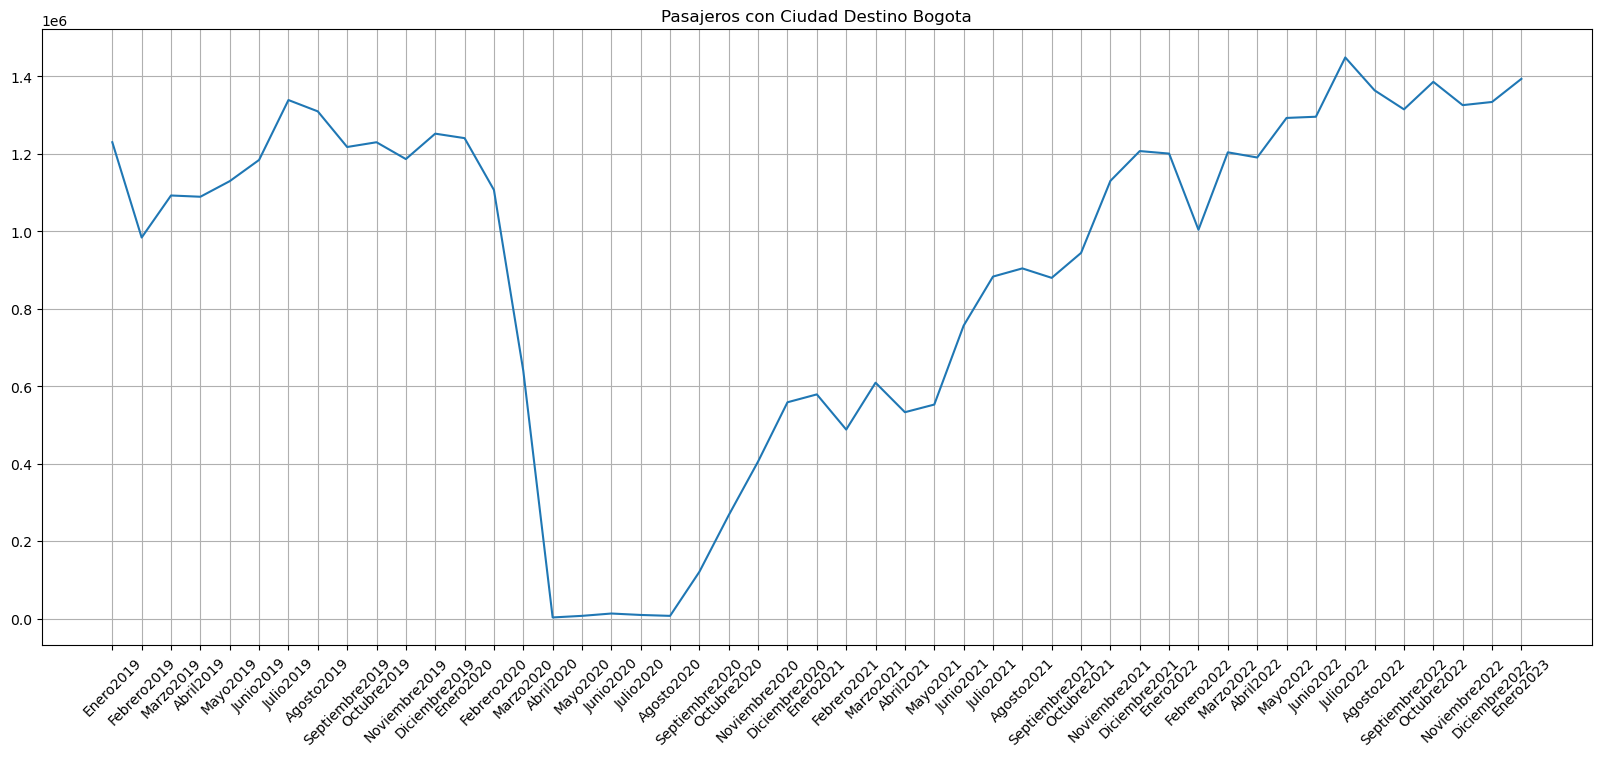

In [9]:
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(20,8))
plt.plot(dfPasajeros['Pasajeros'])
xtickv=dfPasajeros['Mes']+dfPasajeros['Año']
plt.grid()
plt.title('Pasajeros con Ciudad Destino Bogota')
plt.xticks(np.arange(0,dfPasajeros.shape[0]),xtickv,rotation=45)
plt.show()


In [12]:
dfPasajeros.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Año        49 non-null     object
 1   Mes        49 non-null     object
 2   Pasajeros  49 non-null     object
dtypes: object(3)
memory usage: 1.3+ KB


In [ ]:
dfPasajeros.to_pickle(root.DIR_DATA_STAGE+'datosaerocivilmesames.pickle')